In [2]:
# Importing necessary modules from Qiskit
from qiskit import *
from qiskit.tools.visualization import plot_histogram

# This line ensures that plots are displayed inline in Jupyter Notebook
%matplotlib inline

In [3]:
na = '1110'  # Define a binary string 'na'
nb = '1111'  # Define another binary string 'nb'

In [4]:
# Define Quantum Registers for input A, input B, output, and carry bits
ia = QuantumRegister(4,'ia')  # Quantum Register for input A with 4 qubits
ib = QuantumRegister(4,'ib')  # Quantum Register for input B with 4 qubits
cl = QuantumRegister(13,'cl')  # Quantum Register for output with 13 qubits
cry = QuantumRegister(5,'carry')  # Quantum Register for carry bits with 5 qubits

# Define a Classical Register for storing measurement outcomes
c = ClassicalRegister(5)  # Classical Register with 5 bits

# Create a Quantum Circuit with all the defined registers
circuit = QuantumCircuit(ia,ib,cl,cry,c)

# Apply X-gates to input A qubits based on the binary string 'na'
for i, yn in enumerate(reversed(na)):
    if yn == '1':
        circuit.x(ia[i])

# Apply X-gates to input B qubits based on the binary string 'nb'
for i, yn in enumerate(reversed(nb)):
    if yn == '1':
        circuit.x(ib[i])

# Add a barrier to separate input initialization from the main circuit operations
circuit.barrier()

# Ripple-carry adder implementation
for i in range(4):
    circuit.cx(ia[i],cl[i])
    circuit.cx(ib[i],cl[i])

for i in range(4):
    circuit.cx(cl[i], cl[i+4])
    circuit.cx(cry[i], cl[i+4])
    circuit.ccx(ia[i],ib[i], cl[i+8])
    circuit.ccx(cl[i],cry[i], cl[i+9])
    circuit.cx(cl[i+8],cry[i+1])
    circuit.cx(cl[i+9],cry[i+1])
    circuit.ccx(cl[i+8],cl[i+9],cry[i+1])

# Measure output bits and the final carry bit
for i in range(4):
    circuit.measure(cl[i+4],i)
circuit.measure(cry[4],4)

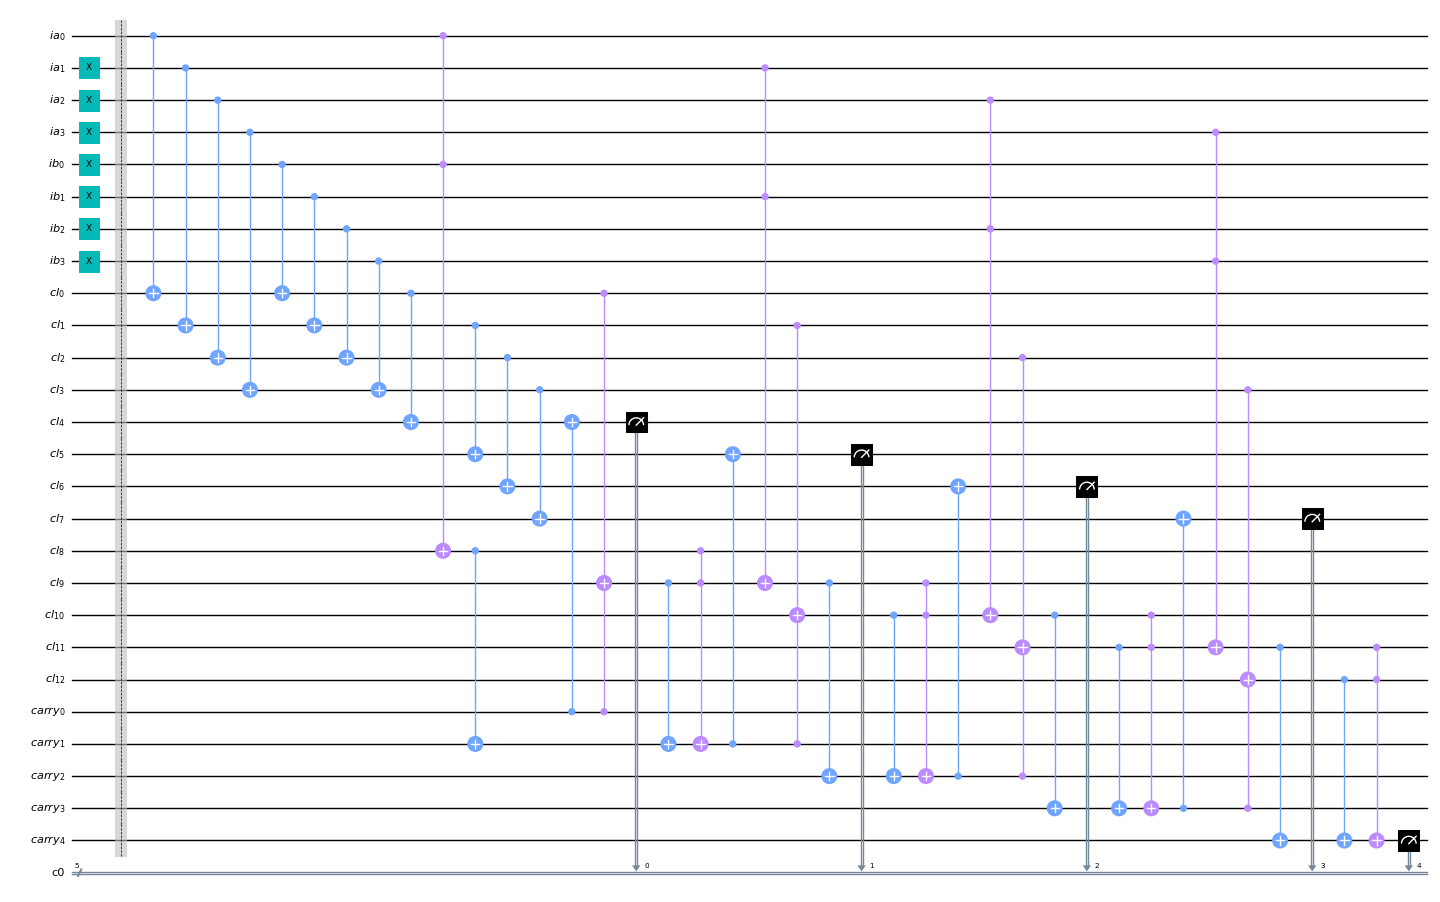

In [5]:
# Draw the quantum circuit with specified parameters and output format using Matplotlib
circuit.draw(scale=0.5, output='mpl', vertical_compression='medium', fold=-1)

In [6]:
# Get the QASM simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the simulator backend with 1 shot
result = execute(circuit, backend=simulator, shots=1).result()

# Retrieve and print the measurement outcomes (counts) from the simulation result
print(result.get_counts())

{'11101': 1}
